## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import warnings

from tqdm import tqdm
import zlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rc
from matplotlib.ticker import PercentFormatter

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.6.9.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.15.0-1100-azure
Version          : #111~16.04.1-Ubuntu SMP Thu Nov 19 06:49:21 UTC 2020
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.18.5
pytz             : 2020.4
dateutil         : 2.8.1
pip              : 20.1.1
setuptools       : 50.3.0.post20201006
Cython           : 0.29.21
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.2
html5lib         : None
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext lo64)
jinja2           : 2.11.2
IPython          : 7.16.1
pandas_datareader: None
bs4          

### Load Data For EDA
There are 4 files found in the data directory:

- IdLookupTable - TBD
- SampleSubmission - TBD
- test - TBD
- training - TBD 

We must load this data in order to perform EDA.  


In [3]:

#https://realpython.com/python-zip-function/#:~:text=%20Using%20the%20Python%20zip%20()%20Function%20for,zip%20()%20function%20works%20differently%20in...%20More

df, git_path = {}, 'data/'
for file_name, file_ref, n, t in zip(['test.csv', 'training.csv', 'IdLookupTable.csv', 'SampleSubmission.csv'],
                        ['test', 'train', 'id_lookup', 'sample_submission', ],
                        [   #test
                            ['image_id', 'image'], 
                            #train
                            ['left_eye_center_x', 'left_eye_center_y',  
                            'right_eye_center_x', 'right_eye_center_y', 
                            'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 
                            'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 
                            'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 
                            'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 
                            'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 
                            'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 
                            'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 
                            'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 
                            'nose_tip_x', 'nose_tip_y', 
                            'mouth_left_corner_x', 'mouth_left_corner_y', 
                            'mouth_right_corner_x', 'mouth_right_corner_y', 
                            'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 
                            'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
                            #IdLookupTable
                            ['row_id', 'image_id', 'feature_name', 'location'],
                            #SampleSubmission
                            ['row_id', 'location']
                        ],

                        [
                             #test   
                            {'image_id':'uint16', 'image':'object'},
                            #train
                            {'left_eye_center_x':'float32', 'left_eye_center_y':'float32', 
                            'right_eye_center_x':'float32', 'right_eye_center_y':'float32', 
                            'left_eye_inner_corner_x':'float32', 'left_eye_inner_corner_y':'float32', 
                            'left_eye_outer_corner_x':'float32', 'left_eye_outer_corner_y':'float32', 
                            'right_eye_inner_corner_x':'float32', 'right_eye_inner_corner_y':'float32',
                            'right_eye_outer_corner_x':'float32', 'right_eye_outer_corner_y':'float32', 
                            'left_eyebrow_inner_end_x':'float32', 'left_eyebrow_inner_end_y':'float32',
                            'left_eyebrow_outer_end_x':'float32', 'left_eyebrow_outer_end_y':'float32', 
                            'right_eyebrow_inner_end_x':'float32', 'right_eyebrow_inner_end_y':'float32',
                            'right_eyebrow_outer_end_x':'float32', 'right_eyebrow_outer_end_y':'float32', 
                            'nose_tip_x':'float32', 'nose_tip_y':'float32', 'mouth_left_corner_x':'float32',
                            'mouth_left_corner_y':'float32', 'mouth_right_corner_x':'float32', 
                            'mouth_right_corner_y':'float32', 'mouth_center_top_lip_x':'float32', 
                            'mouth_center_top_lip_y':'float32','mouth_center_bottom_lip_x':'float32', 
                            'mouth_center_bottom_lip_y':'float32', 'image':'object'},
                             #IdLookupTable
                            {'row_id':'uint16', 'image_id':'uint16', 'location':'float32'},
                            #SampleSubmission
                            {'row_id':'uint16', 'location':'float32'}
                        ],
                        ):
    #This is the begining of the for loop for each file:
    print("Load files.")
    print("Begin loading file '%s' " % "".join( (git_path, file_name)))
    #print(file_ref)
    df[file_ref] = pd.read_csv("".join( (git_path,file_name) ), names = n, dtype = t, skiprows = 1)
    
    #If the file contains an image column like in the case of test.csv store those images now. 
    if "image" in df[file_ref]:
        print("\tFound %d images. Processing. " % df[file_ref].shape[0])
        #Get the row with the image data and store it in the dataframe 
        df[file_ref]['image'] = df[file_ref]["image"].map(lambda x: np.array(list(map(int, x.split(" ")))))
    print("\tFile", file_ref, " with shape:", df[file_ref].shape, " load complete\n")

print("Load files complete")

Load files.
Begin loading file 'data/test.csv' 
	Found 1783 images. Processing. 
	File test  with shape: (1783, 2)  load complete

Load files.
Begin loading file 'data/training.csv' 
	Found 7049 images. Processing. 
	File train  with shape: (7049, 31)  load complete

Load files.
Begin loading file 'data/IdLookupTable.csv' 
	File id_lookup  with shape: (27124, 4)  load complete

Load files.
Begin loading file 'data/SampleSubmission.csv' 
	File sample_submission  with shape: (27124, 2)  load complete

Load files complete


In [4]:
train, test = df['train'][['image']], df['test'][['image']]


In [5]:
# Check for duplicate train images
train = df['train'].reset_index().copy()
#Get the images and perform a checksum on every image in train: https://www.geeksforgeeks.org/zlib-adler32-in-python/
train['check_sum'] = train.image.map(lambda x: zlib.adler32(x))

#Create a DF to store duplicates, grouping them together and sorting them
train_duplicates = pd.DataFrame(train.groupby(by='check_sum').index.count().sort_values()).reset_index()
#Add a column to keep track of how many of each check sum there are
train_duplicates.columns = ['check_sum', 'number_found']
#Keep the ones where we have > 1 number_found
train_duplicates = train_duplicates[(train_duplicates.number_found > 1)]
#Now do a left outer join back to train_duplicates.  This should only keep the duplicates 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#:~:text=merge%20is%20a%20function%20in%20the%20pandas%20namespace,,the%20index-on-index%20(by%20default)%20and%20column%20(s)-on-index%20join.
train_duplicates = pd.merge(train_duplicates, train[['index', 'check_sum']],  how = 'left', on=['check_sum']).sort_values(by=['number_found', 'check_sum'], ascending = False)


#Now do the same for test:
# Check for duplicate train images
test = df['test'].reset_index().copy()
#Get the images and perform a checksum on every image in train: https://www.geeksforgeeks.org/zlib-adler32-in-python/
test['check_sum'] = test.image.map(lambda x: zlib.adler32(x))
#Create a DF to store duplicates, grouping them together and sorting them
test_duplicates = pd.DataFrame(test.groupby(by='check_sum').index.count().sort_values()).reset_index()
#Add a column to keep track of how many of each check sum there are
test_duplicates.columns = ['check_sum', 'number_found']
#Keep the ones where we have > 1 number_found
test_duplicates = test_duplicates[(test_duplicates.number_found > 1)]
#Now do a left outer join back to train_duplicates.  This should only keep the duplicates 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#:~:text=merge%20is%20a%20function%20in%20the%20pandas%20namespace,,the%20index-on-index%20(by%20default)%20and%20column%20(s)-on-index%20join.
test_duplicates = pd.merge(test_duplicates, test[['index', 'check_sum']],  how = 'left', on=['check_sum']).sort_values(by=['number_found', 'check_sum'], ascending = False)

print("EDA on duplicate data in train and test datasets: ")
print("The train dataset has %d unique images out of the %d duplicate images from the total of %d images" % (len(np.unique(train_duplicates.check_sum)), len(train_duplicates), train.size))
print("The test dataset has %d unique images out of %d duplicate images from the total of %d images" % (len(np.unique(test_duplicates.check_sum)),len(test_duplicates), test.size))

#Clean up:
#We don't really need the check_sum column anymore...so drop it
train.drop(columns=['check_sum'], inplace=True)
test.drop(columns=['check_sum'], inplace=True)

EDA on duplicate data in train and test datasets: 
The train dataset has 543 unique images out of the 1098 duplicate images from the total of 232617 images
The test dataset has 29 unique images out of 60 duplicate images from the total of 7132 images


In [6]:
print(train.size)
print(train_duplicates.size)

225568
3294


[2490 3741 5414 5969 6583 3113 3740 4296 4873 5970 2681 3317 3936 3937
 2678 3935 5066 6149 2774 4574 6243 2773 5141 6858 5977 6596 2456 3686
 3551 4122 3665 4801 2316 7013 4400]


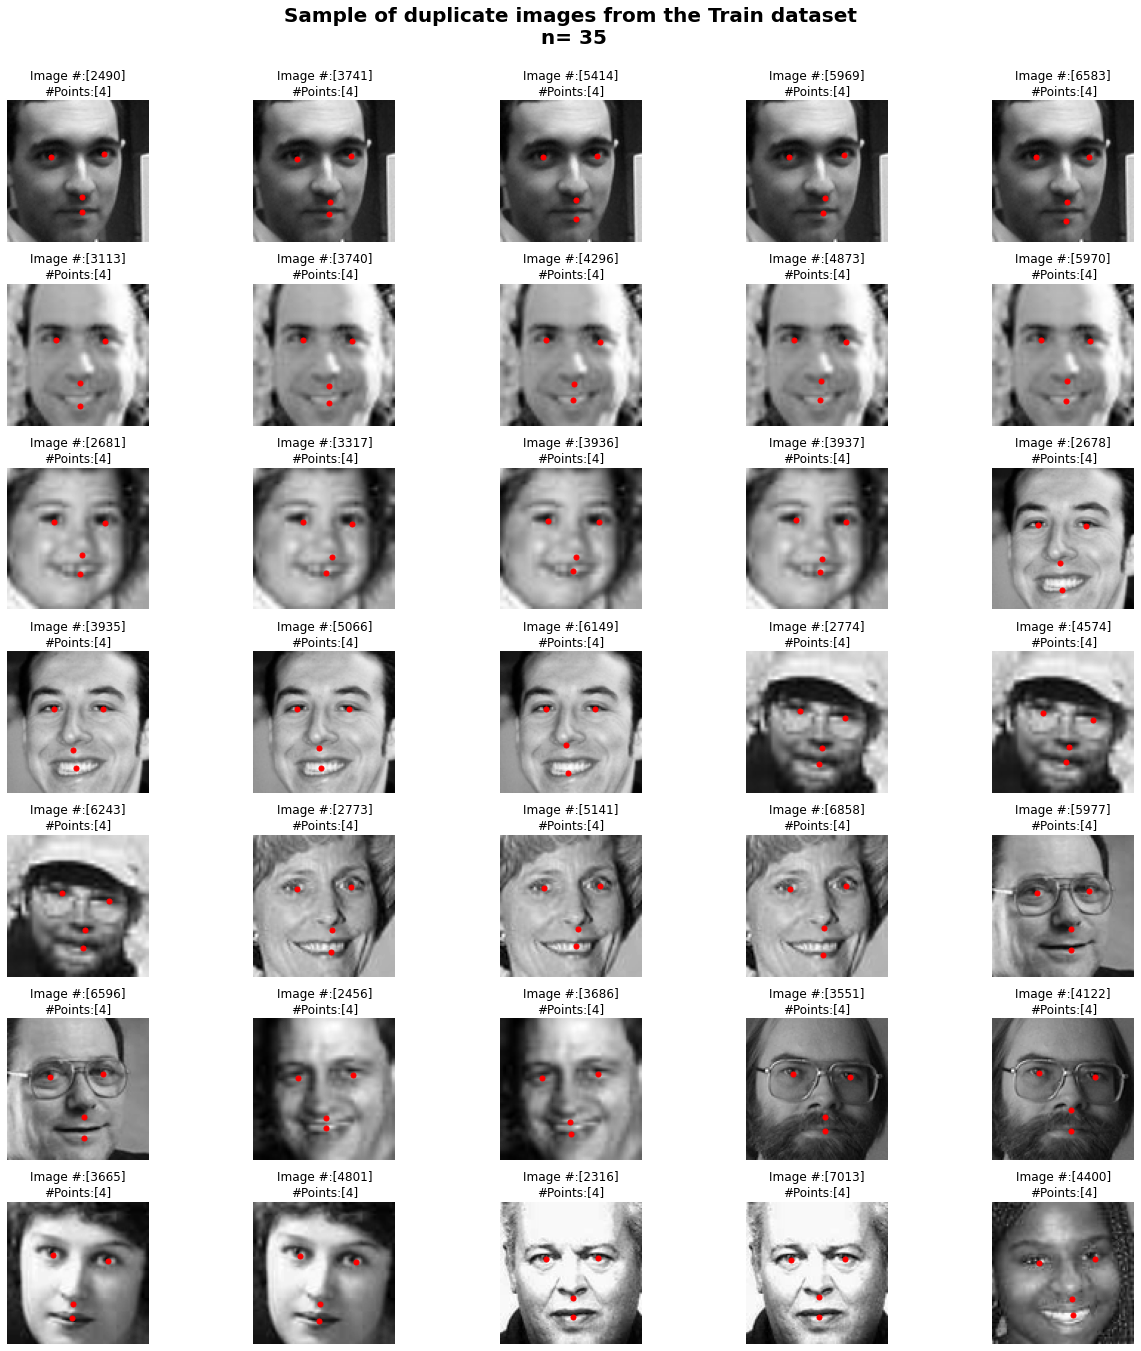

In [7]:

## TRAIN 
# Let's view some of these duplicated train images
fig = plt.figure(figsize=(18,18))
fig.suptitle('Sample of duplicate images from the Train dataset\n n= 35', size = 20,  y = 1.04, weight = 'bold')
#Get the point coordinates for example: mouth_center_top_lip_x
coordinates = [c for c in train.columns if c.endswith('_x') | c.endswith('_y')]
#print(coordinates)
#Get the top 35 duplicate images
idx = train_duplicates.head(35)['index'].values
#For testing, these are the duplicate ID's
print(idx)

match_pts = pd.DataFrame(columns =['Points_Found', 'Count'])

#Loop through and plot each of the 35 images.  
for i, idx in enumerate(idx):
    plt.subplot(7,5,i+1)
    img = train[(train['index'] == idx)].image.values[0].reshape(96,96)
    #These are the points that have been identified on the images
    points = train[(train['index'] == idx)][coordinates].values[0]
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    matching_pts = 0

    for pts in range(0, 30, 2):
        x_point, y_point = (points[pts], points[pts+1])
        if not (np.isnan(x_point)) and not (np.isnan(y_point)):
            matching_pts += 1
            #Add the point to the plot
            plt.plot(x_point, y_point, 'o', color = "red", markersize = 5)

    plt.title("Image #:[%d]\n#Points:[%d]" % (idx, matching_pts))
    if matching_pts in match_pts["Points_Found"].values:
            match_pts.loc[match_pts['Points_Found'] == matching_pts, 'Count'] = match_pts.loc[match_pts['Points_Found'] == matching_pts, 'Count'] + 1
    else:
        match_pts = match_pts.append({'Points_Found':matching_pts,'Count': 1},ignore_index=True)


plt.tight_layout()
plt.show()

[2490 3741 5414 ... 6101 2451 4266]
  Points_Found Count
0            4  1096
1           15     1
2           13     1


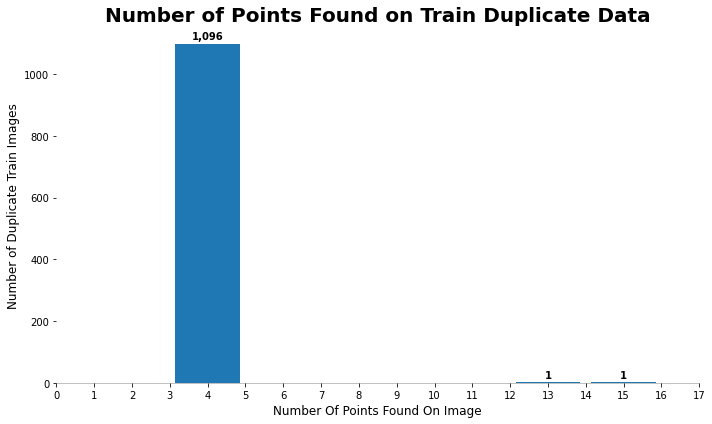

In [8]:
idx = train_duplicates['index'].values
#For testing, these are the duplicate ID's
print(idx)
match_pts = pd.DataFrame(columns =['Points_Found', 'Count'])
coordinates = [c for c in train.columns if c.endswith('_x') | c.endswith('_y')]
#Loop through and plot each of the 35 images.  
for i, idx in enumerate(idx):
    img = train[(train['index'] == idx)].image.values[0].reshape(96,96)
    #These are the points that have been identified on the images
    points = train[(train['index'] == idx)][coordinates].values[0]
    matching_pts = 0

    for pts in range(0, 30, 2):
        x_point, y_point = (points[pts], points[pts+1])
        if not (np.isnan(x_point)) and not (np.isnan(y_point)):
            matching_pts += 1
            
    if matching_pts in match_pts["Points_Found"].values:
            match_pts.loc[match_pts['Points_Found'] == matching_pts, 'Count'] = match_pts.loc[match_pts['Points_Found'] == matching_pts, 'Count'] + 1
            
    else:
        match_pts = match_pts.append({'Points_Found': matching_pts,'Count': 1},ignore_index=True)
        
print(match_pts)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.set_title('Number of Points Found on Train Duplicate Data', fontsize = 20, fontweight = 'bold')
ax.bar(match_pts.Points_Found, match_pts.Count, width = 1.7)
ax.set_xticks(range(0,18,1))
for i, r in match_pts.iterrows():
    plt.text(r.Points_Found, r.Count + 25, format(r.Count, ",d"), 
        horizontalalignment = 'center', verticalalignment = 'center', fontweight ='bold')
ax.spines["top"].set_alpha(.0)
ax.spines["bottom"].set_alpha(.3)
ax.spines["right"].set_alpha(.0)
ax.spines["left"].set_alpha(.0)
ax.set_xlabel("Number Of Points Found On Image", fontsize = 12, horizontalalignment='center')
ax.set_ylabel("Number of Duplicate Train Images", fontsize = 12, horizontalalignment='center')

plt.tight_layout()
plt.show()


In [9]:
print(train_duplicates.columns)

Index(['check_sum', 'number_found', 'index'], dtype='object')


In [11]:
#Do the duplicate Train images have the same labels? Let's test one out. 

#Get only the first images checksum from duplicate train and then get the images that match the check_sum
duplicate_image_chksum = train_duplicates.iloc[0, train_duplicates.columns.get_loc('check_sum')] 

duplicate_image_index = train_duplicates.loc[(train_duplicates.check_sum == duplicate_image_chksum)]['index'].values

#Create an array of all of the coumns with x,y in them
coordinate_columns = [c for c in train.columns if c.endswith('_x') | c.endswith('_y')]

#Get the df so we can display something meaningful
duplicate_image_df = train.loc[(train['index'].isin(duplicate_image_index))][coordinate_columns]

#https://mode.com/example-gallery/python_dataframe_styling/
duplicate_image_df.style\
    .highlight_max(subset=coordinate_columns,color='green')\
    .set_na_rep("N/A").format(None, na_rep="Missing")\
    .highlight_null('yellow')
    

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/io/formats/style.py:1409: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmax(data.to_numpy())
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/io/formats/style.py:1409: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmax(data.to_numpy())


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
2490,65.334175,35.471878,29.366461,37.767685,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,50.411373,64.934769,Missing,Missing,Missing,Missing,Missing,Missing,50.028778,74.883240
3741,65.446320,37.164719,29.093319,39.233547,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,51.555363,68.197731,Missing,Missing,Missing,Missing,Missing,Missing,50.964199,76.177589
5414,65.501717,36.826946,28.705406,37.491913,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,51.315178,67.194923,Missing,Missing,Missing,Missing,Missing,Missing,51.093525,79.608154
5969,65.636299,36.285984,28.892820,38.154251,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,52.869461,65.867554,Missing,Missing,Missing,Missing,Missing,Missing,51.312550,75.831932
6583,65.277435,37.893036,29.051128,37.893036,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,50.183113,68.356033,Missing,Missing,Missing,Missing,Missing,Missing,49.359776,81.293228


In [12]:
#The lables do not match exactly in the duplicate Train images.  The challenge would be to determine which of the images to keep if we remove all but one of the duplicate images. We have two options:

#1 - Keep the first duplicate and disregard the others - Easy to do, low cost but we risk losing data.
#2 - Take the average for all coordiantes across the duplicate image and apply those coordinates moving forward. A little more work invovled and risk of introducing more errors to the lables. 

#If we were to do #2 this is how the above image would reconcile:
#Take the mean of the columns and create a new DF
duplicate_image_df = pd.DataFrame(train.loc[(train['index'].isin(duplicate_image_index))][coordinate_columns].mean())

#Display results
duplicate_image_df.T.style\
    .set_na_rep("N/A").format(None, na_rep="Missing")\
    .highlight_null('yellow')




,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,65.439186,36.728512,29.021826,38.108086,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,51.266899,66.910202,Missing,Missing,Missing,Missing,Missing,Missing,50.551765,77.558823


## Test Dataset Duplicate Data

In [13]:
test = df['test'].reset_index().copy()
print(test.size)
print(test_duplicates.size)
print(test.size/test_duplicates.size, "% of test data is duplicates")

5349
180
29.716666666666665 % of test data is duplicates


[ 949 1569 1572  942  948 1570  324  391 1242 1248 1067 1674 1361 1376
  851 1471  353  386  373  395  913 1537  950  951  352  394  658 1304
 1400 1406  720 1354  741  746 1157]


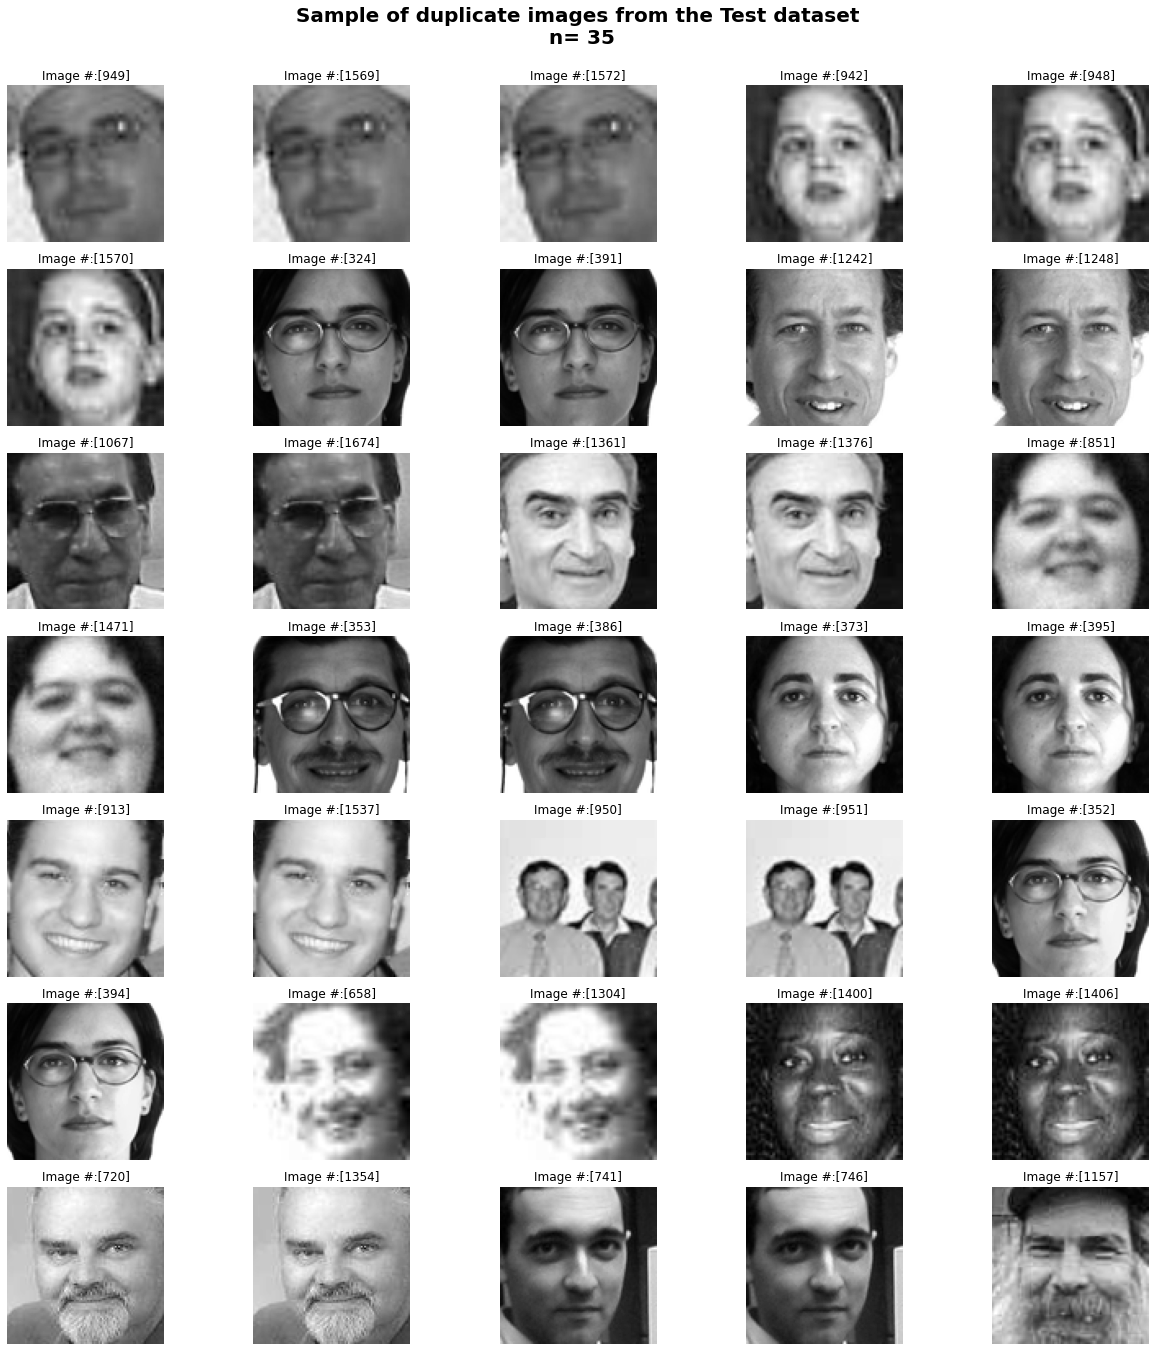

In [14]:
## TEST 
# Let's view some of these duplicated train images
fig = plt.figure(figsize=(18,18))
fig.suptitle('Sample of duplicate images from the Test dataset\n n= 35', size = 20,  y = 1.04, weight = 'bold')
#Get the point coordinates for example: mouth_center_top_lip_x

#Get the top 35 duplicate images
idx = test_duplicates.head(35)['index'].values
#For testing, these are the duplicate ID's
print(idx)

#Loop through and plot each of the 35 images.  
for i, idx in enumerate(idx):
    plt.subplot(7,5,i+1)
    img = test[(test['index'] == idx)].image.values[0].reshape(96,96)
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    plt.title("Image #:[%d]" % (idx))
    
plt.tight_layout()
plt.show()

## Duplication Conclusions -EDA on duplicate data in train and test datasets:
Train:

1. The train dataset has 543 unique images out of the 1098 duplicate images from the total of 232617 images

2. Of the 1098 duplicate images:
    - 1096 of them had 4 points
    - 1 had  13 points
    - 1 had 15 points

Test:

1. The test dataset has 29 unique images out of 60 duplicate images from the total of 7132 images
